# Mini-Projet Traitement du Signal

Romain LAGARDE, Tom SCHIPPKE


**QUESTIONS:**


-représentation spectrale, représenter les amplitudes <0 ??


-bonne idée de "filtrer" des le début

-I-C tout ca pr prendre n=1 ?? Intéret ?

-II-C bizarre 



In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt


## I. Modulation et démodulation DSB-SC

### A. Modulation



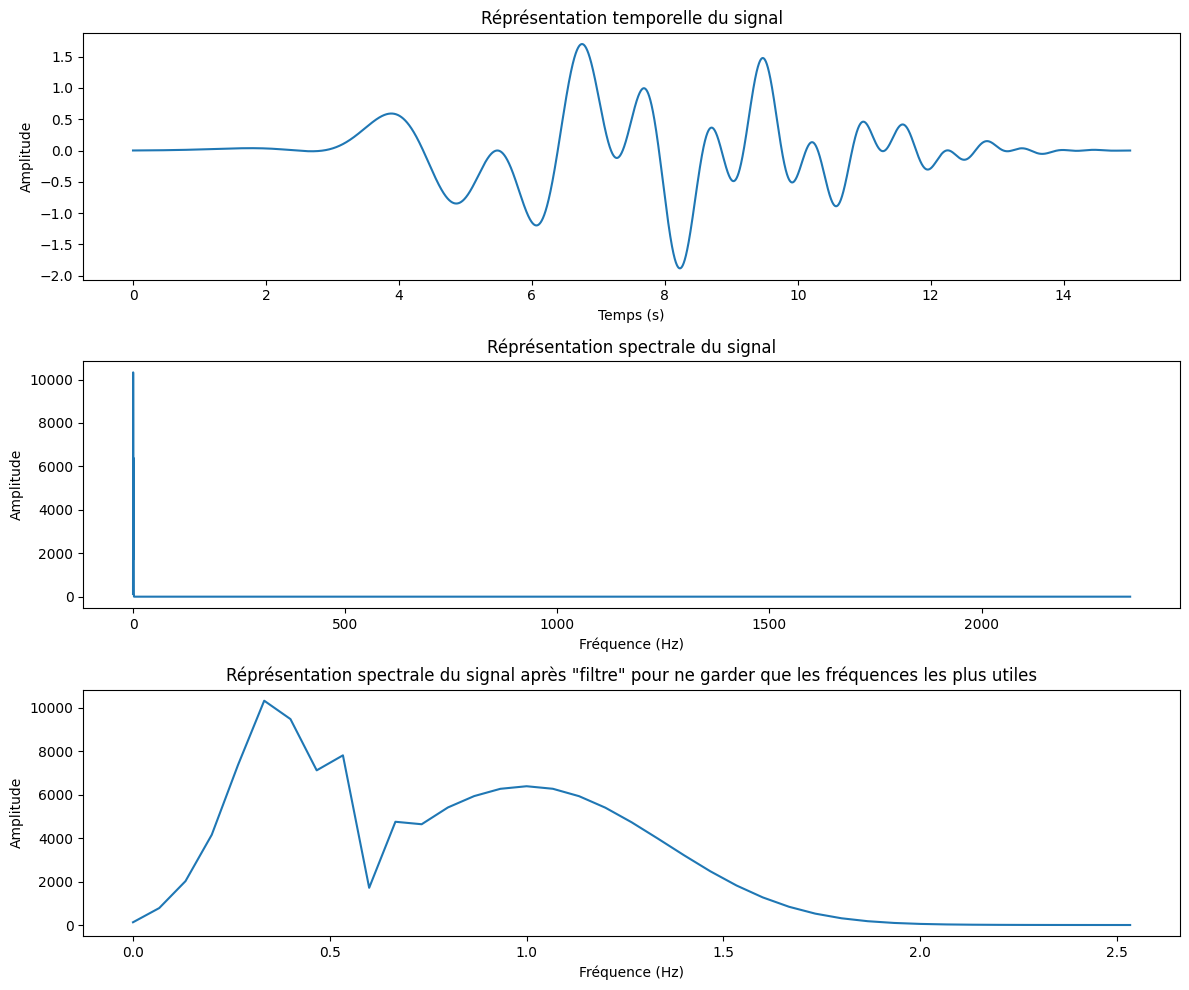

In [2]:
fc = 47.0 # carrier frequency
finfty = fc*1e2 # very high "continuous" frequency
T = 15. # duration of signal
N = round(finfty*T) # number of samples

t = np.arange(0.0, N)/finfty
pulsation1 = 2*np.pi*t/T
pulsation2 = 2*np.pi/np.sqrt(7)*t/T

xRaw = np.cos(pulsation1*t) + np.sin(pulsation2*t)

window = sig.windows.kaiser(N,9)
x = xRaw*window


plt.figure(figsize=(12, 10))

#Représentation temporelle du signal
plt.subplot(3, 1, 1)
plt.plot(t,x)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation temporelle du signal')

#Représentation de la fft du signal

X=np.fft.fft(x)
freq=np.fft.fftfreq(N, d=1/finfty)



plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X[:N//2]))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal')

indice_à_garder = np.abs(X) > 1
X_tild=X[indice_à_garder]
freq_tild=freq[indice_à_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild[freq_tild>=0],np.abs(X_tild[freq_tild>=0]))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.show()


La Fréquence maximale du signal est approximativement **B=2Hz**.


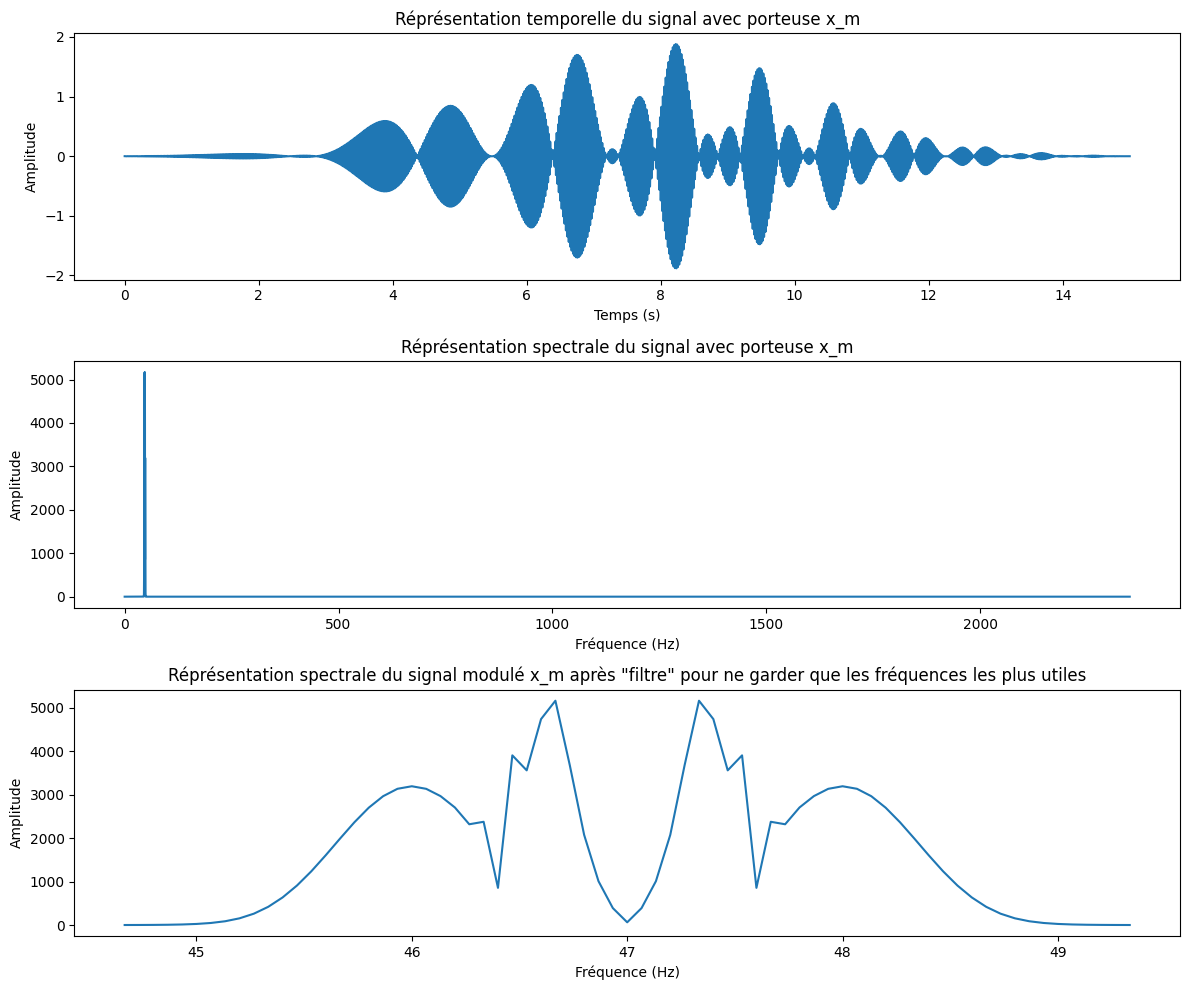

In [3]:
#fabrication du signal modulé
x_m=x*np.cos(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))


#Représentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_m)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation temporelle du signal avec porteuse x_m')


#Représentation de la fft du signal

X_m=np.fft.fft(x_m)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_m[:N//2]))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal avec porteuse x_m')

indice_à_garder = np.abs(X_m) > 1
X_m_tild=X_m[indice_à_garder]
freq_tild=freq[indice_à_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild[freq_tild>=0],np.abs(X_m_tild[freq_tild>=0]))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_m après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.show()


On parle de **DSB-SC**, ou "Double sideband-suppressed carrier" (ou encore Modulation à double bande latérale et porteuse supprimée) car **l'onde modulée est seulement constituée des bandes latérales supérieure et inférieure du signal**.

### B. Démodulation synchrone “analogique”

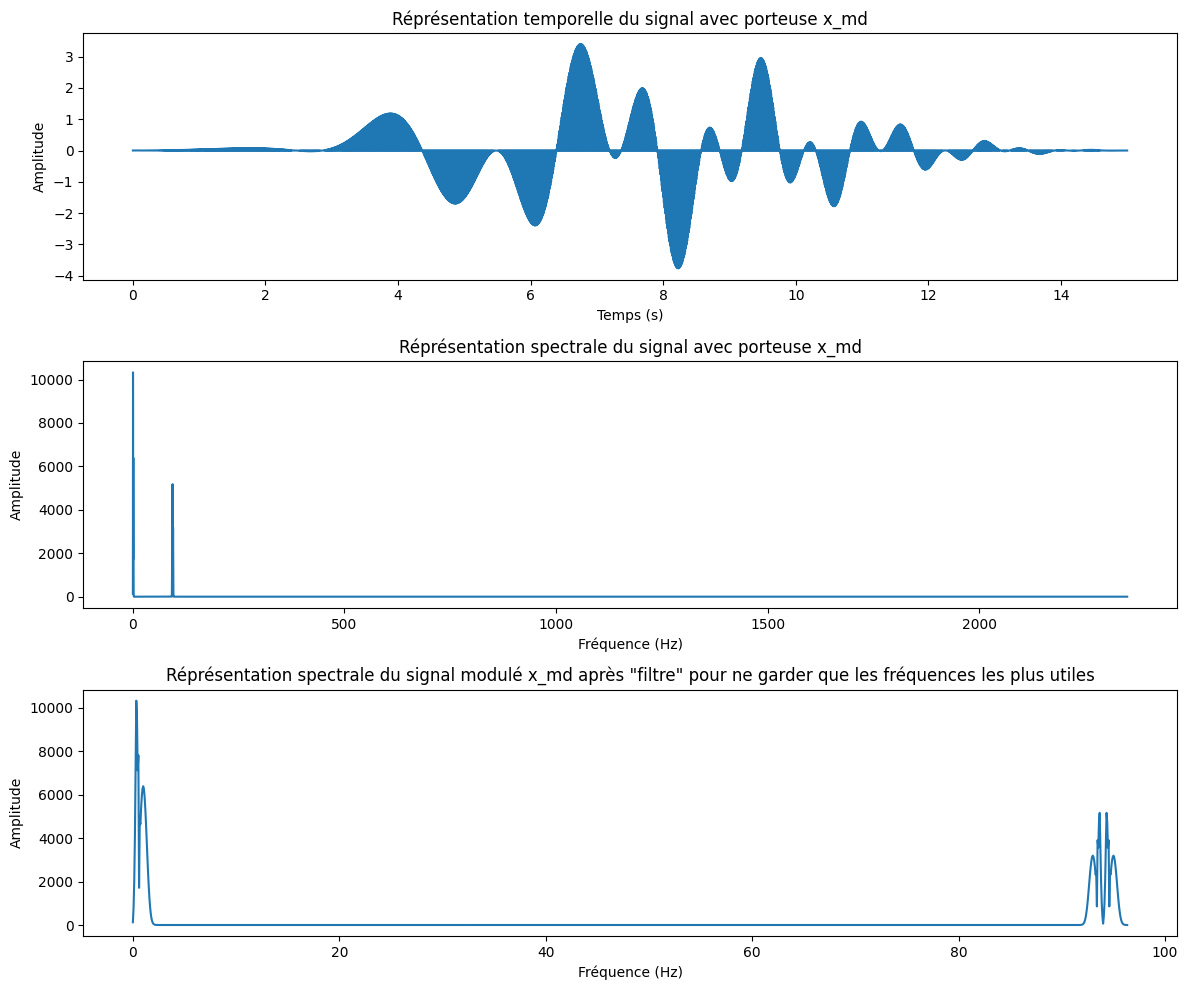

In [4]:
#fabrication du signal modulé
x_md=2*x_m*np.cos(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))

#Représentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_md)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation temporelle du signal avec porteuse x_md')

X_md=np.fft.fft(x_md)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_md[:N//2]))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal avec porteuse x_md')

indice_à_garder = np.abs(X_md) > 1
X_md_tild=X_md[indice_à_garder]
freq_tild=freq[indice_à_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild[freq_tild>=0],np.abs(X_md_tild[freq_tild>=0]))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_md après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.show()


La fonction de transfert d'un filtre passe bas du premier ordre est: $H(j \omega)=\frac{1}{1+j\tau \omega}$. Si $s(t)$ est le signal de sortie du filtre correspondant à une entrée $e(t)$, l'équation différentielle associée est: $\tau \frac{ds(t)}{dt} + s(t) = e(t)$. 

L'équation discrétisée est alors: $\tau \frac{s_{n+1}-s_{n}}{dt} + s_n = e_n$ (approximation d'Euler), où $dt$ est le pas d'itération. Donc $s_{n+1}= \frac{dt}{\tau}(e_n - s_n) +s_n$.

La fréquence de coupure du filtre est $ f_{coup}=\frac{1}{2    \pi \tau}$, on a ainsi :
 $$s_{n+1}= 2 \pi f_{coup}(e_n - s_n)dt  +s_n$$

On réalise cet algorithme en prenant un pas d'itération très petit et en considérant $f_{coup}= 20Hz$ au vu des tracés et études précédentes (afin de ne garder que la partie spectrale du signal initial et de supprimer la partie spectrale du à la modulation).


c:\miniconda\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


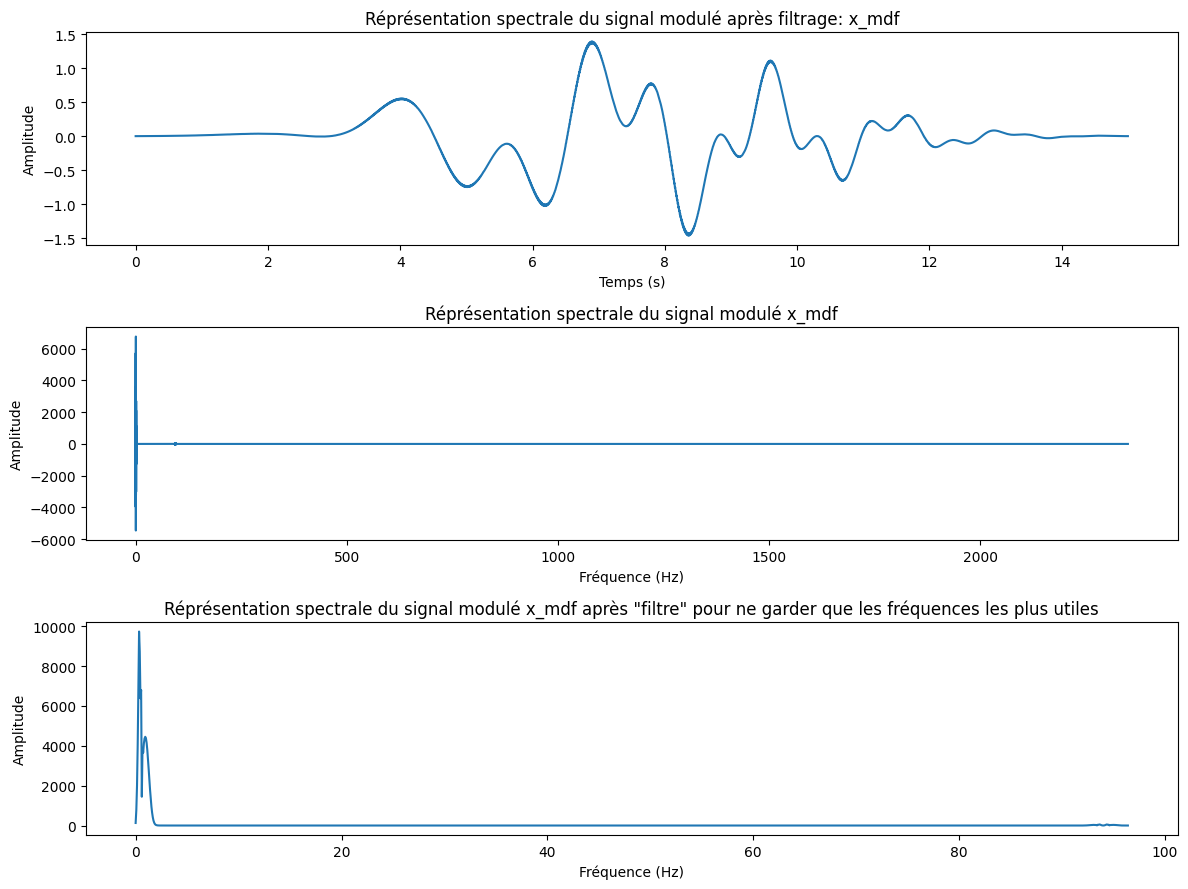

In [5]:
#filtre passe bas de fréquence de coupure: HZ

N_md=len(x_md)
dt=1e-5
f_coup=20


x_mdf=np.zeros(N_md)
x_mdf[0]=0 #on prend comme valeur initiale 0 (cf début du sujet)
for i in range(1,N_md):
    x_mdf[i]=dt*2*np.pi*f_coup*(x_md[i-1] - x_mdf[i-1]) + x_mdf[i-1]




#Représentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t,x_mdf)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé après filtrage: x_mdf')


X_mdf=np.fft.fft(x_mdf)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],X_mdf[:N//2])
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_mdf')

indice_à_garder = np.abs(X_mdf) > 0.01
X_mdf_tild=X_mdf[indice_à_garder]
freq_tild=freq[indice_à_garder]

plt.subplot(3, 1, 3)

plt.plot(freq_tild[freq_tild>=0],np.abs(X_mdf_tild[freq_tild>=0]))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_mdf après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.show()

On retrouve le signal initial et son spectre. La partie spectrale de la modulation reste tout de même très légerment présente (au niveau de 97Hz), on pourrait, pour palier cela, utiliser un filtre passe bas d'ordre supérieur.


Il faudrait échantillonner $x_{mdf}$ à une fréquence d'au moins $2f_{max}= 2* 1,75= 3,5Hz$.


la démodulation présentée ici se fait d’habitude avec
des composants analogiques. Serait-il possible de réaliser numériquement le même traitement après avoir
échantillonné 𝑥_𝑚 ? Quelle est la fréquence minimale
d’échantillonnage possible ?


### C. Démodulation synchrone par sous-échantillonnage


[]

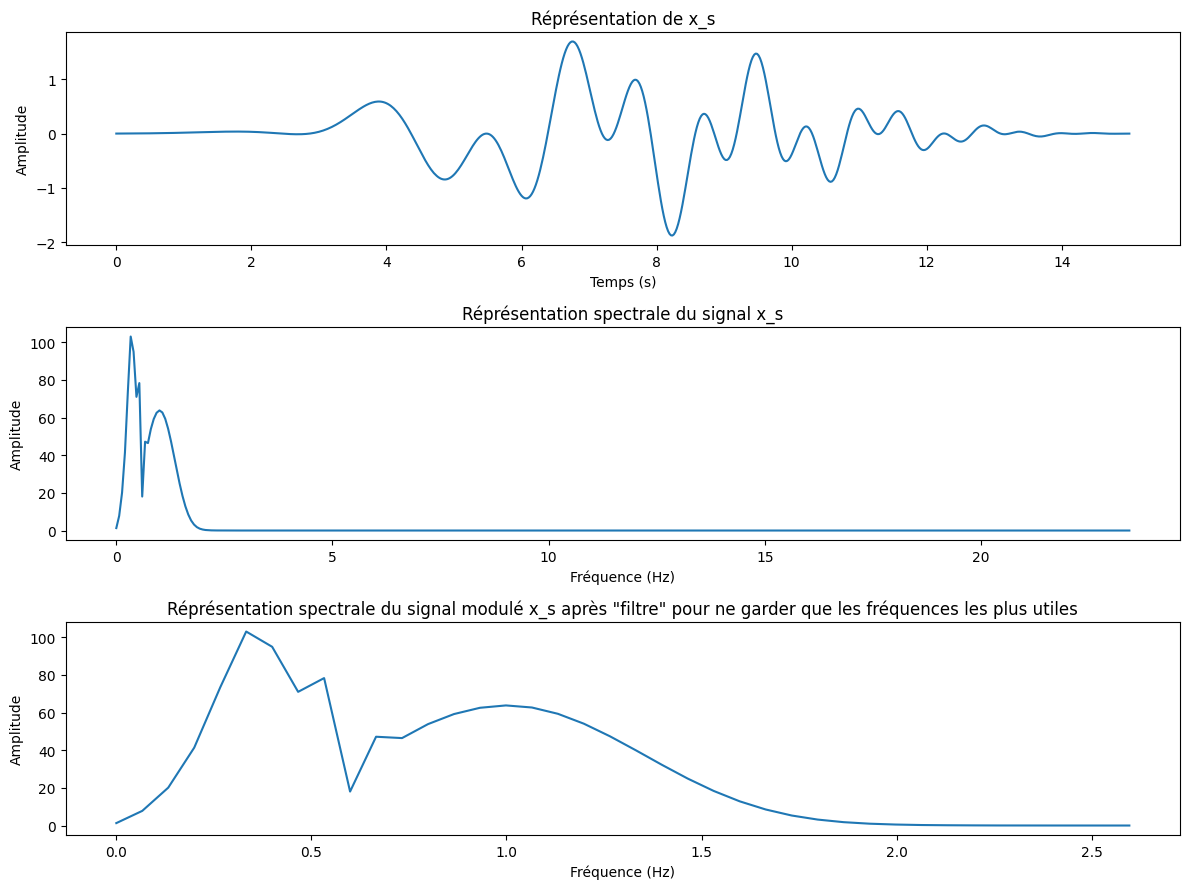

In [6]:
n=1
N_m=len(x_m)
f_s=fc/n
dt=1/f_s #pas d'échantillonnage

x_s=[]
t1=[]
t_comp=int(0)

while t_comp<T:

    indice=int(np.floor(t_comp*N_m/T))
    x_s.append(x_m[indice])
    t1.append(t_comp)
    t_comp+=dt

x_s=np.array(x_s)
t1=np.array(t1)

#Représentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t1,x_s)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation de x_s')


X_s=np.fft.fft(x_s)
freq_s=np.fft.fftfreq(len(X_s), d=1/f_s)

plt.subplot(3, 1, 2)
plt.plot(freq_s[freq_s>=0],np.abs(X_s[freq_s>=0]))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal x_s')

indice_à_garder = np.abs(X_s) > 0.01
X_s_tild=X_s[indice_à_garder]
freq_s_tild=freq_s[indice_à_garder]

plt.subplot(3, 1, 3)

plt.plot(freq_s_tild[freq_s_tild>=0],np.abs(X_s_tild[freq_s_tild>=0]))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_s après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.plot()


 
On retrouve le signal initial. Cependant sons spectre n'est pas identique (modification de la valeur des amplitudes spectrales).

Cette méthode permet de se débarasser des fréquences du à la modulation, i.e. supérieures à 90Hz (cela est possible en echantillonnant à une fréquence 47Hz).



 Conclusion ? Quelle est la
fréquence minimale d’échantillonnage possible ?
— intérêt de cette procédure ? Interprétation temporelle et
fréquentielle ?


## II. Modulation-démodulation DSB-SC avec sinus

### A. Modulation


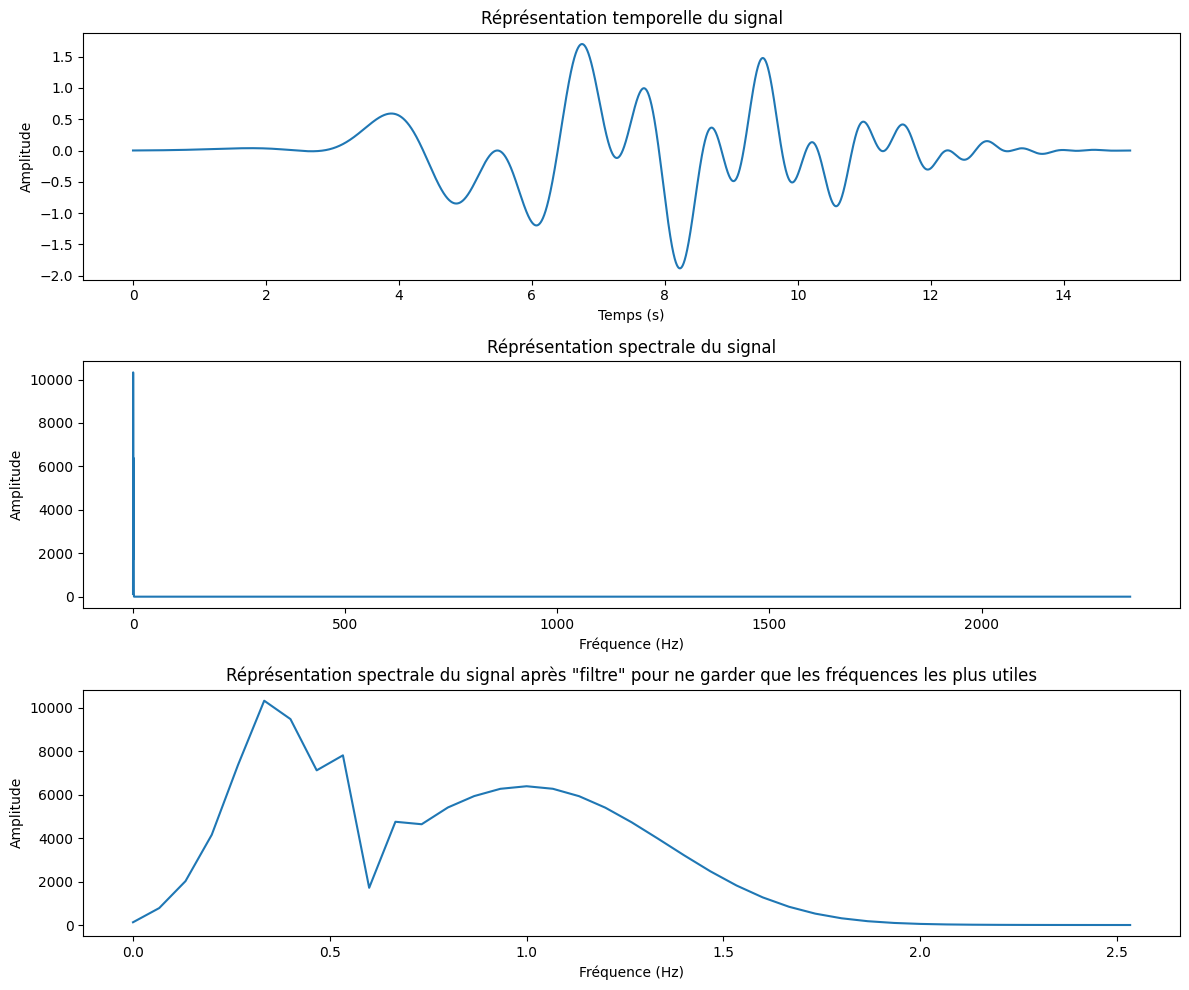

In [7]:
fc = 47.0 # carrier frequency
finfty = fc*1e2 # very high "continuous" frequency
T = 15. # duration of signal
N = round(finfty*T) # number of samples

t = np.arange(0.0, N)/finfty
pulsation1 = 2*np.pi*t/T
pulsation2 = 2*np.pi/np.sqrt(7)*t/T

xRaw = np.cos(pulsation1*t) + np.sin(pulsation2*t)

window = sig.windows.kaiser(N,9)
x = xRaw*window


plt.figure(figsize=(12, 10))

#Représentation temporelle du signal
plt.subplot(3, 1, 1)
plt.plot(t,x)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation temporelle du signal')

#Représentation de la fft du signal

X=np.fft.fft(x)
freq=np.fft.fftfreq(N, d=1/finfty)



plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X[:N//2]))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal')

indice_à_garder = np.abs(X) > 1
X_tild=X[indice_à_garder]
freq_tild=freq[indice_à_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild[freq_tild>=0],np.abs(X_tild[freq_tild>=0]))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.show()

La Fréquence maximale du signal est approximativement **B=2Hz**.


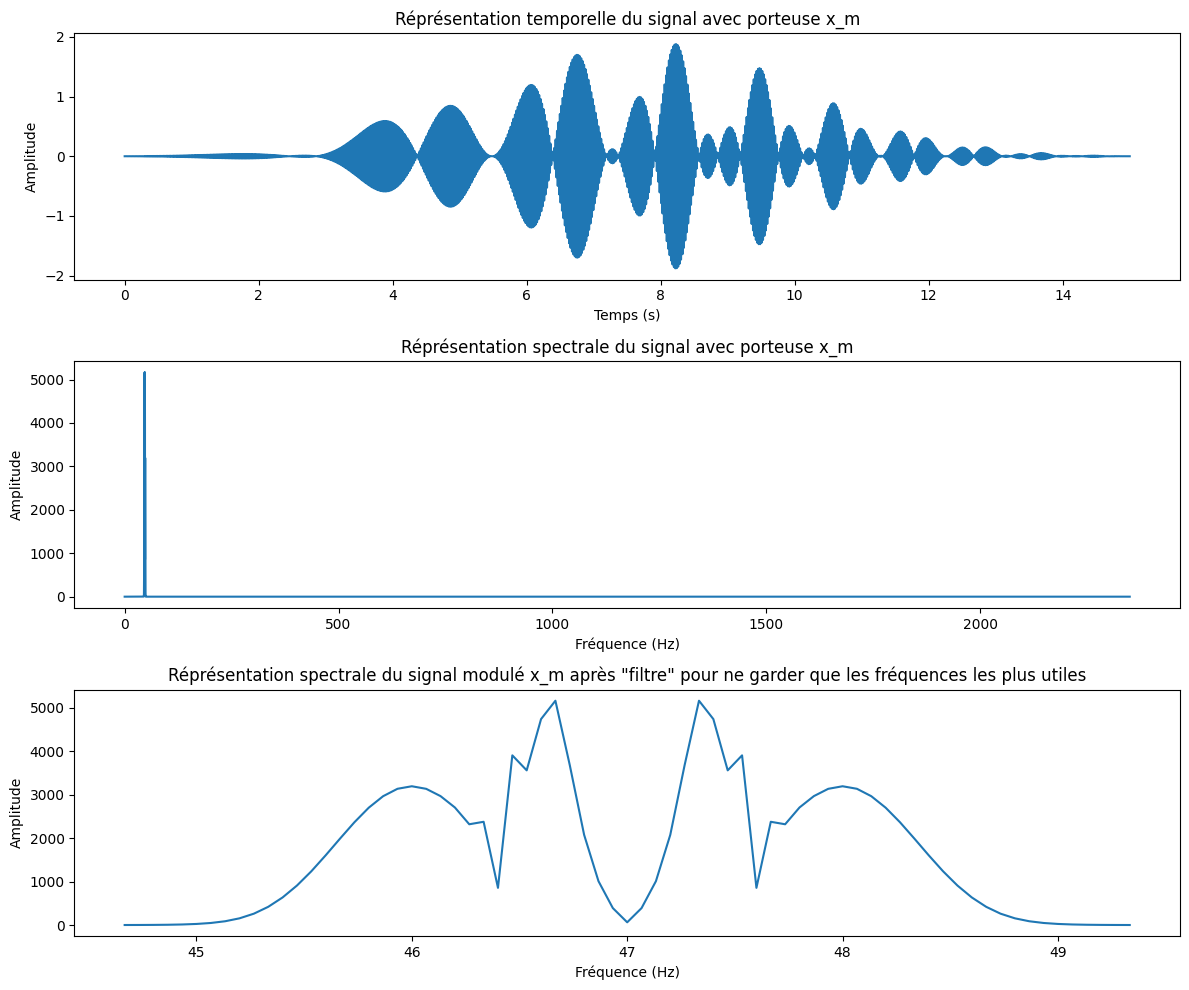

In [8]:
#fabrication du signal modulé
x_m=x*np.sin(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))


#Représentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_m)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation temporelle du signal avec porteuse x_m')


#Représentation de la fft du signal

X_m=np.fft.fft(x_m)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_m[:N//2]))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal avec porteuse x_m')

indice_à_garder = np.abs(X_m) > 1
X_m_tild=X_m[indice_à_garder]
freq_tild=freq[indice_à_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild[freq_tild>=0],np.abs(X_m_tild[freq_tild>=0]))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_m après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.show()


On parle de **DSB-SC**, ou "Double sideband-suppressed carrier" (ou encore Modulation à double bande latérale et porteuse supprimée) car **l'onde modulée est seulement constituée des bandes latérales supérieure et inférieure du signal**.

### B. Démodulation synchrone “analogique”

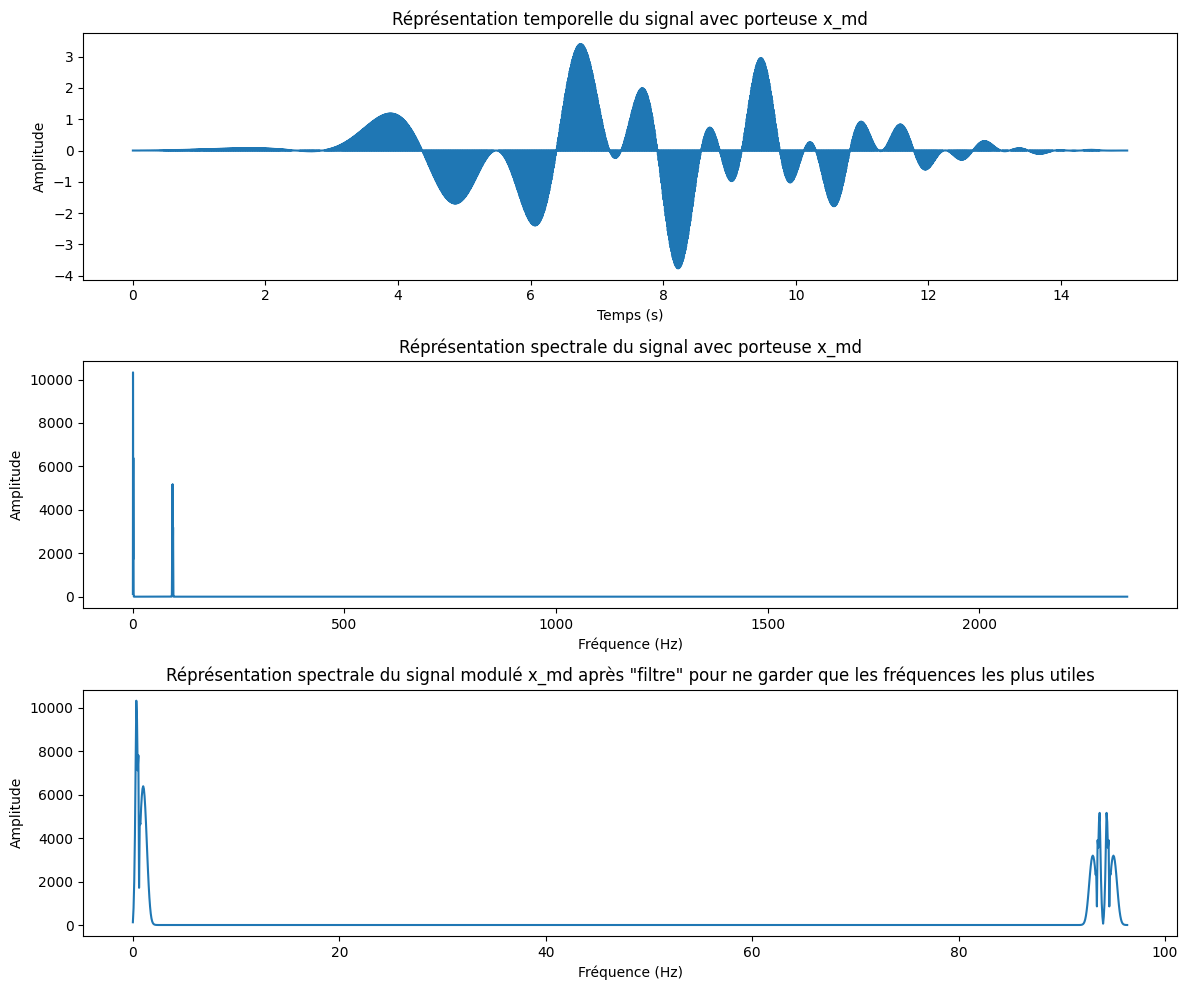

In [9]:
#fabrication du signal modulé
x_md=2*x_m*np.sin(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))

#Représentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_md)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation temporelle du signal avec porteuse x_md')

X_md=np.fft.fft(x_md)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_md[:N//2]))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal avec porteuse x_md')

indice_à_garder = np.abs(X_md) > 1
X_md_tild=X_md[indice_à_garder]
freq_tild=freq[indice_à_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild[freq_tild>=0],np.abs(X_md_tild[freq_tild>=0]))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_md après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.show()


La fonction de transfert d'un filtre passe bas du premier ordre est: $H(j \omega)=\frac{1}{1+j\tau \omega}$. Si $s(t)$ est le signal de sortie du filtre correspondant à une entrée $e(t)$, l'équation différentielle associée est: $\tau \frac{ds(t)}{dt} + s(t) = e(t)$. 

L'équation discrétisée est alors: $\tau \frac{s_{n+1}-s_{n}}{dt} + s_n = e_n$ (approximation d'Euler), où $dt$ est le pas d'itération. Donc $s_{n+1}= \frac{dt}{\tau}(e_n - s_n) +s_n$.

La fréquence de coupure du filtre est $ f_{coup}=\frac{1}{2    \pi \tau}$, on a ainsi :
 $$s_{n+1}= 2 \pi f_{coup}(e_n - s_n)dt  +s_n$$

On réalise cet algorithme en prenant un pas d'itération très petit et en considérant $f_{coup}= 20Hz$ au vu des tracés et études précédentes (afin de ne garder que la partie spectrale du signal initial et de supprimer la partie spectrale du à la modulation).


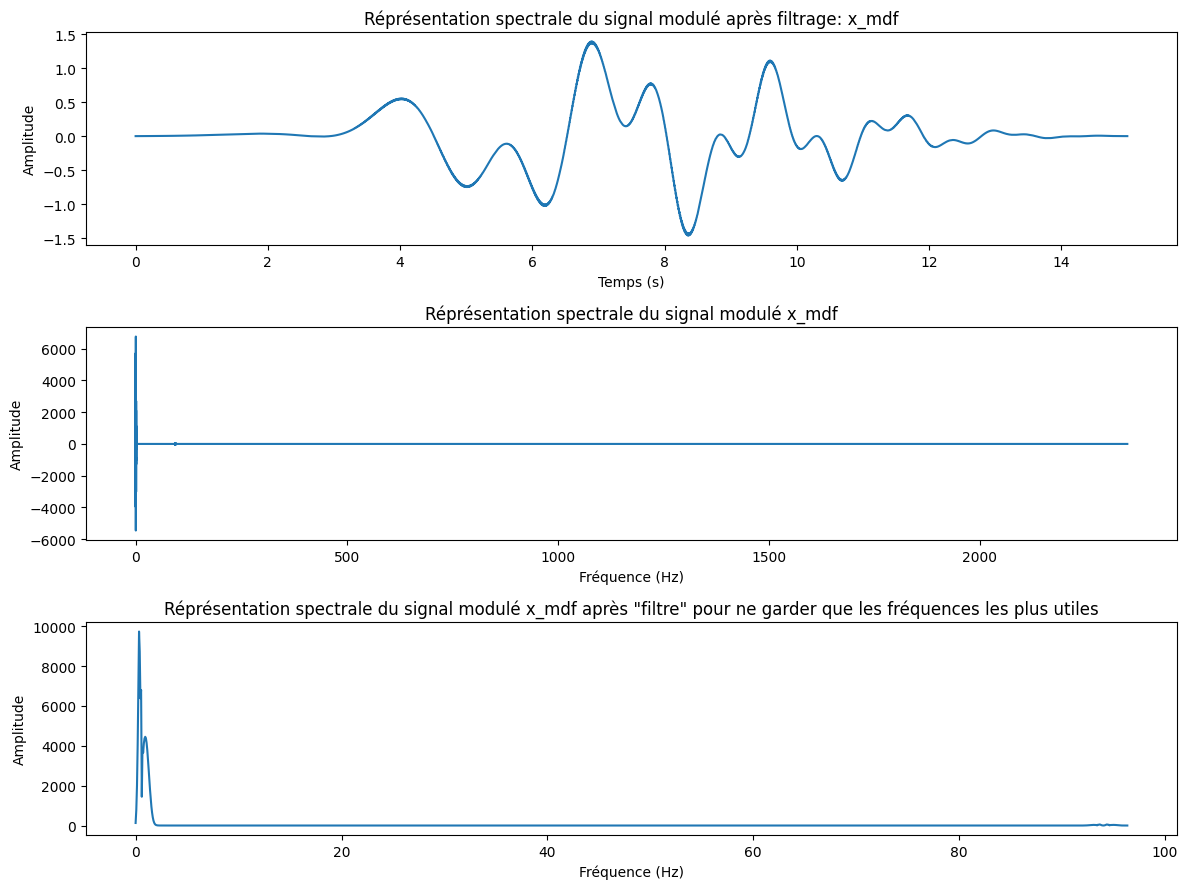

In [10]:
#filtre passe bas de fréquence de coupure: HZ

N_md=len(x_md)
dt=1e-5
f_coup=20


x_mdf=np.zeros(N_md)
x_mdf[0]=0 #on prend comme valeur initiale 0 (cf début du sujet)
for i in range(1,N_md):
    x_mdf[i]=dt*2*np.pi*f_coup*(x_md[i-1] - x_mdf[i-1]) + x_mdf[i-1]




#Représentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t,x_mdf)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé après filtrage: x_mdf')


X_mdf=np.fft.fft(x_mdf)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],X_mdf[:N//2])
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_mdf')

indice_à_garder = np.abs(X_mdf) > 0.01
X_mdf_tild=X_mdf[indice_à_garder]
freq_tild=freq[indice_à_garder]

plt.subplot(3, 1, 3)

plt.plot(freq_tild[freq_tild>=0],np.abs(X_mdf_tild[freq_tild>=0]))  
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal modulé x_mdf après "filtre" pour ne garder que les fréquences les plus utiles')

plt.tight_layout()
plt.show()

On retrouve le signal initial et son spectre. La partie spectrale de la modulation reste tout de même très légerment présente (au niveau de 97Hz), on pourrait, pour palier cela, utiliser un filtre passe bas d'ordre supérieur.


Il faudrait échantillonner $x_{mdf}$ à une fréquence d'au moins $2f_{max}= 2* 1,75= 3,5Hz$.


la démodulation présentée ici se fait d’habitude avec
des composants analogiques. Serait-il possible de réaliser numériquement le même traitement après avoir
échantillonné 𝑥_𝑚 ? Quelle est la fréquence minimale
d’échantillonnage possible ?


### C. Démodulation synchrone par sous-échantillonnage


[]

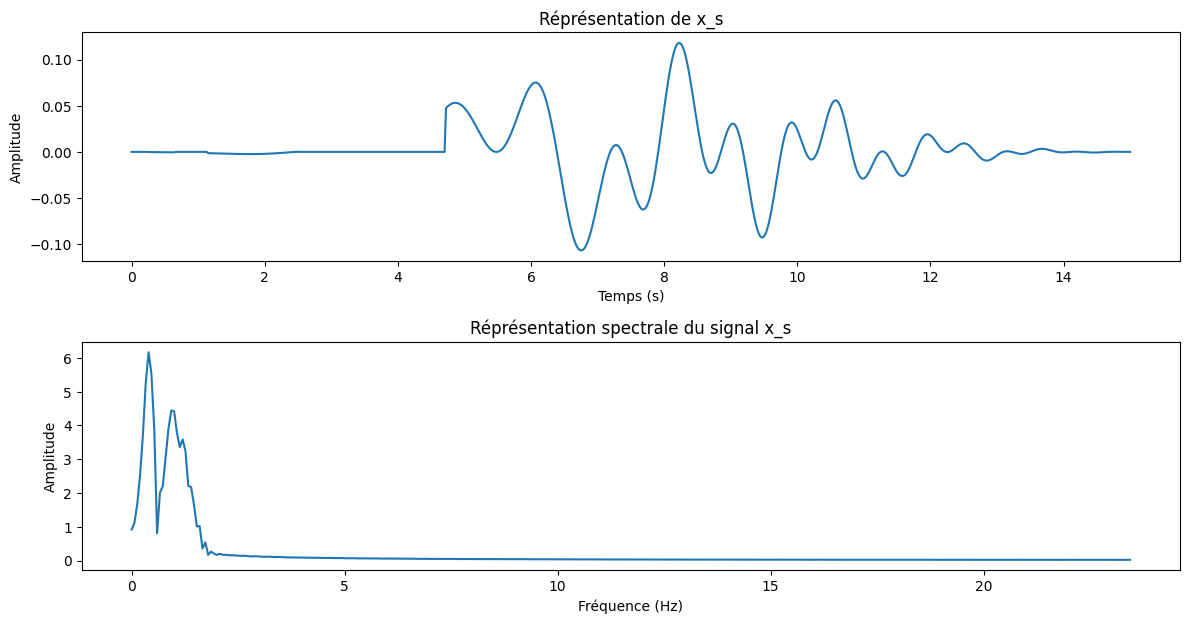

In [11]:
n=1
N_m=len(x_m)
f_s=fc/n
dt=1/f_s #pas d'échantillonnage

x_s=[]
t1=[]
t_comp=int(0)

while t_comp<T:

    indice=int(np.floor(t_comp*N_m/T))
    x_s.append(x_m[indice])
    t1.append(t_comp)
    t_comp+=dt

x_s=np.array(x_s)
t1=np.array(t1)

#Représentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t1,x_s)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('Réprésentation de x_s')


X_s=np.fft.fft(x_s)
freq_s=np.fft.fftfreq(len(X_s), d=1/f_s)

plt.subplot(3, 1, 2)
plt.plot(freq_s[freq_s>=0],np.abs(X_s[freq_s>=0]))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.title('Réprésentation spectrale du signal x_s')

plt.tight_layout()
plt.plot()

On ne retrouve pas le signal initial. Cependant sons spectre n'est pas identique (modification de la valeur des amplitudes spectrales).

Cette méthode permet de se débarasser des fréquences du à la modulation, i.e. supérieures à 90Hz (cela est possible en echantillonnant à une fréquence 47Hz).



 Conclusion ? Quelle est la
fréquence minimale d’échantillonnage possible ?
— intérêt de cette procédure ? Interprétation temporelle et
fréquentielle ?

## III. Modulation et démodulation QAM (Quadrature Amplitude Modulation)

La modulation DSB-SC “gaspille” de la bande passante ;
pourquoi ? En s’inspirant des résultats de la section précédente,
montrer qu’on peut transmettre deux signaux 𝑥𝐼 (𝑡) et 𝑥𝑄 (𝑡)
en même temps, en modulant cos(2𝜋 𝑓𝑐𝑡) par 𝑥𝐼 et sin(2𝜋 𝑓𝑐𝑡)
par 𝑥𝑄, et en sommant le résultat, d’où le signal modulé composite 𝑥𝑚(𝑡) := 𝑥𝐼 (𝑡) cos(2𝜋 𝑓𝑐𝑡) +𝑥𝑄 (𝑡) sin(2𝜋 𝑓𝑐𝑡). Reprendre
les questions des sections I-A à I-C dans ce cas.
Pour 𝑥𝐼 (𝑡), utiliser le signal 𝑥(𝑡) de la partie I-A ; pour
𝑥𝑄 (𝑡), fabriquer un signal différent, mais avec à peu près la
même fréquence maximale 𝐵.

## IV. Modulation et démodulation SSB-SC (Single-SideBand Supressed-Carrier)

Si on n’a q’un seul signal 𝑥(𝑡) à transmettre, une autre
façon d’économiser la bande passante est la modulation à
bande unique “SSB-SC” ; pourquoi ? Reprendre les questions
les questions de la partie I dans ce cas (pour la modulation,
on pourra utiliser la fonction scipy.signal.hilbert).
